<a href="https://colab.research.google.com/github/faruk17035/MachineLearning-Using-GoogleColab/blob/main/Enzyme_A%2BZ_ROC_08_04_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam

import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/Enzyme A+Z.xlsx' 
df = pd.read_excel(file_name, index_col=0)
print(df.head()) # print the first 5 rows

            PubchemFP2  PubchemFP3  PubchemFP4  ...  PAAC49  PAAC50  Target
PubchemFP1                                      ...                        
1                    1           0           0  ...   2.526   2.456       1
1                    1           0           0  ...   2.335   2.616       1
1                    1           1           0  ...   2.335   2.616       1
1                    1           1           0  ...   2.394   2.424       1
1                    1           0           0  ...   2.478   2.502       1

[5 rows x 931 columns]


In [4]:
#Split data into independent (X) and dependent(Y) columns

y = df['Target'].values
X = df.drop('Target', axis=1).values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [7]:
print(X_train.shape)
print(X_test.shape)

(6525, 930)
(1632, 930)


In [9]:
### Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train = X_train.reshape(6525, 930,1)
X_test = X_test.reshape(1632, 930, 1)

In [18]:
epochs = 30
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape = (930,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer=Adam(lr=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30
204/204 [==============================] - 3s 9ms/step - loss: 1.4901 - accuracy: 0.6666 - val_loss: 0.6518 - val_accuracy: 0.7255
Epoch 2/30
204/204 [==============================] - 2s 8ms/step - loss: 0.5814 - accuracy: 0.6939 - val_loss: 0.5673 - val_accuracy: 0.7384
Epoch 3/30
204/204 [==============================] - 2s 7ms/step - loss: 0.5476 - accuracy: 0.7015 - val_loss: 0.4954 - val_accuracy: 0.7659
Epoch 4/30
204/204 [==============================] - 2s 8ms/step - loss: 0.5354 - accuracy: 0.7208 - val_loss: 0.4429 - val_accuracy: 0.7837
Epoch 5/30
204/204 [==============================] - 2s 7ms/step - loss: 0.5049 - accuracy: 0.7262 - val_loss: 0.4680 - val_accuracy: 0.7825
Epoch 6/30
204/204 [==============================] - 2s 8ms/step - loss: 0.5084 - accuracy: 0.7196 - val_loss: 0.4463 - val_accuracy: 0.7763
Epoch 7/30
204/204 [==============================] - 2s 8ms/step - loss: 0.5037 - accuracy: 0.7301 - val_loss: 0.4453 - val_accuracy: 0.7917
Epoch 

In [21]:
#y_pred = model.predict(X_train).ravel()
from sklearn.metrics import roc_curve
y_pred_cnn = model.predict(X_test).ravel()
fpr_4, tpr_4, thresholds = roc_curve(y_test, y_pred_cnn)
from sklearn.metrics import auc
auc_score4 = auc(fpr_4, tpr_4)
auc_score4

0.9011997913406364

In [22]:
#Split data into independent (X) and dependent(Y) columns

Y = df['Target'].values
X = df.drop('Target', axis=1).values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [24]:
### Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
model1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model1.fit(X_train, y_train)
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr_1, tpr_1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

0.8447013032965738


In [26]:
model2 = SVC(kernel = 'linear',probability=True, random_state = 0)
model2.fit(X_train, y_train)

pred_prob2 = model2.predict_proba(X_test)

fpr_2, tpr_2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print(auc_score2)

0.8254307112949562


In [32]:
#Split data into independent (X) and dependent(Y) columns

Y = df['Target'].values
X = df.drop('Target', axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 24)

### Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model3 = XGBClassifier(random_state=20)
model3.fit(X_train, y_train)

pred_prob3 = model3.predict_proba(X_test)

fpr_3, tpr_3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])

print(auc_score3)

0.8806650127594376


In [33]:
auc_score1 = 0.84
auc_score2 = 0.83
auc_score3 = 0.88
auc_score4 = 0.90

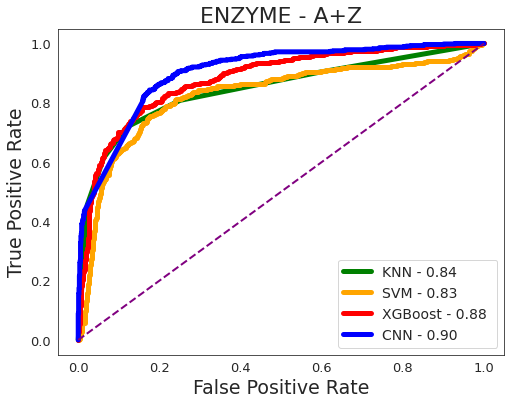

In [34]:
sns.set_style("white")
plt.figure(figsize=(8,6))

plt.plot(fpr_1,tpr_1, color = "green", label = "KNN - %0.2f " %auc_score1, lw = 5)
plt.plot(fpr_2,tpr_2, color = "orange", label = "SVM - %0.2f " %auc_score2, lw = 5)
plt.plot(fpr_3,tpr_3, color = "red", label = "XGBoost - %0.2f " %auc_score3, lw = 5)
plt.plot(fpr_4,tpr_4, color = "blue", label = "CNN - %0.2f " %auc_score4, lw = 5)

plt.plot([0,1], [0,1], color = 'purple', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize = 19)
plt.ylabel('True Positive Rate', fontsize=19)
plt.title('ENZYME - A+Z', fontsize=22)
plt.legend(loc = "lower right", fontsize=14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('ROC_all',dpi=300)
plt.show()